In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data = pd.read_csv('C:/Users/naman/Desktop/ML datasets/term_deposit_subscription_classification.csv')

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


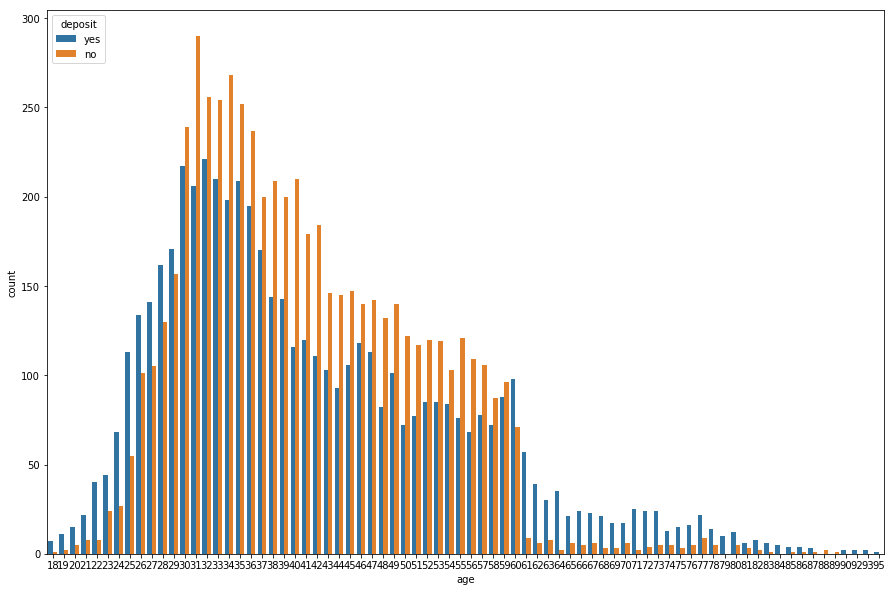

In [12]:
plt.figure(figsize=(15,10))
sns.countplot('age',data = data,hue='deposit')

People below 28 or above 60 years of age are more likely to subscribe to term deposits

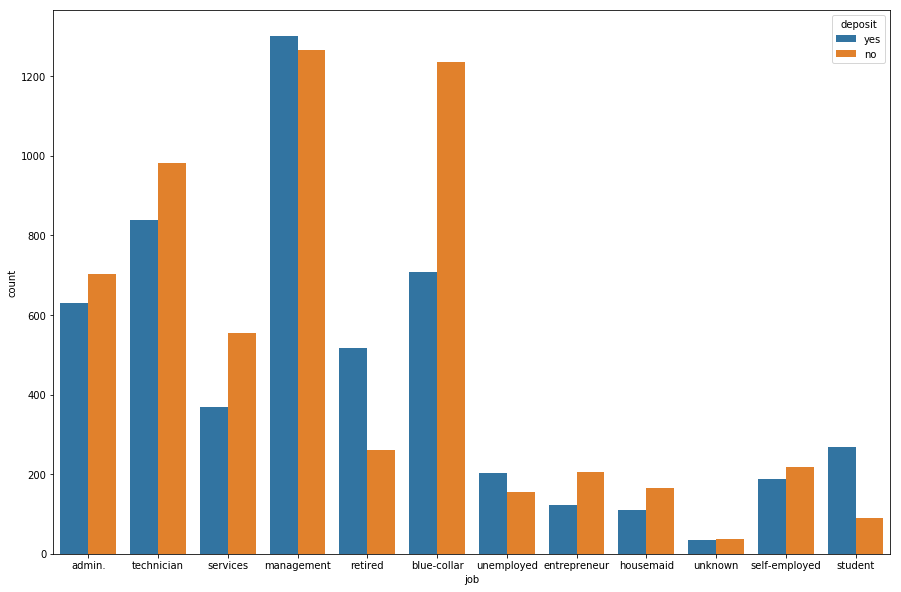

In [14]:
plt.figure(figsize=(15,10))
sns.countplot('job',data = data,hue='deposit')

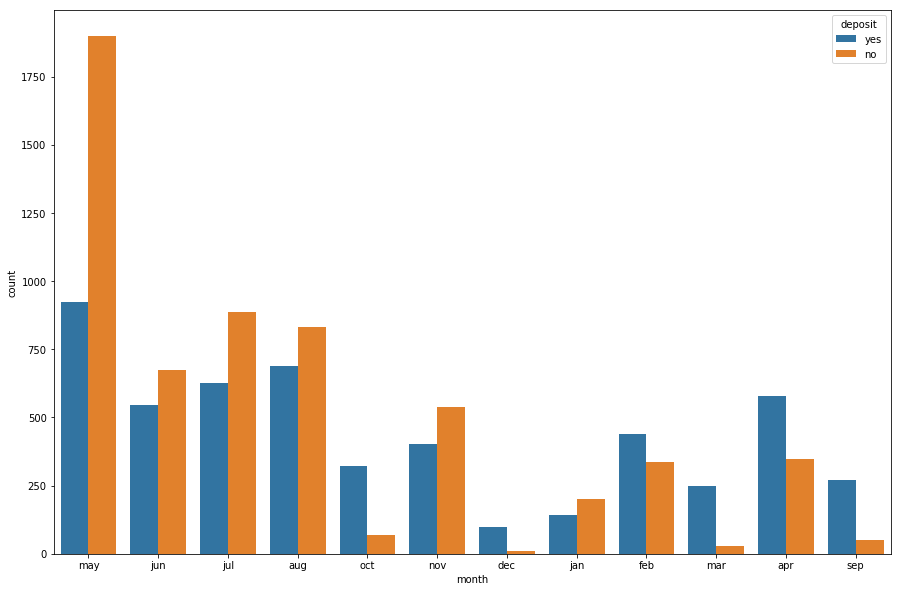

In [21]:
plt.figure(figsize=(15,10))
sns.countplot('month',data = data,hue='deposit')

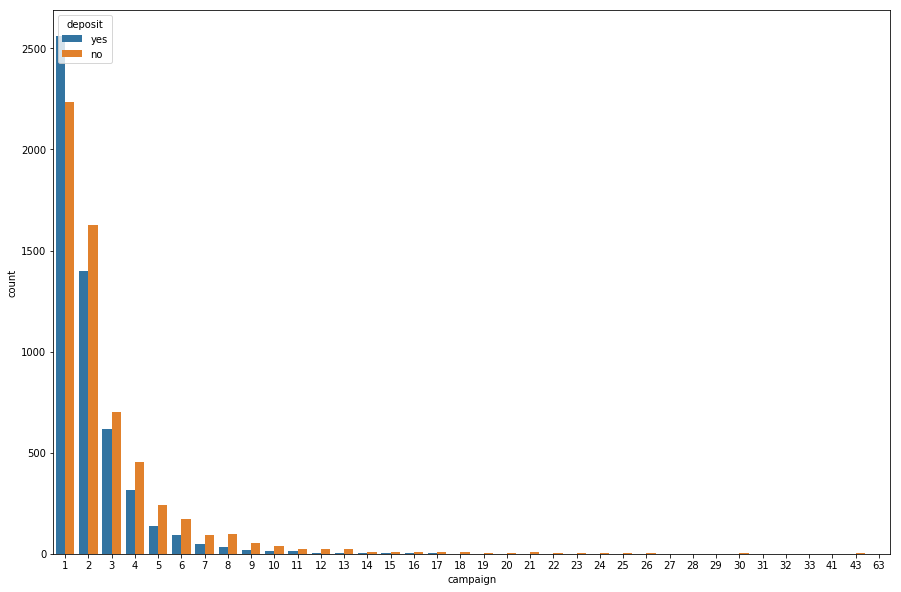

In [22]:
plt.figure(figsize=(15,10))
sns.countplot('campaign',data = data,hue='deposit')

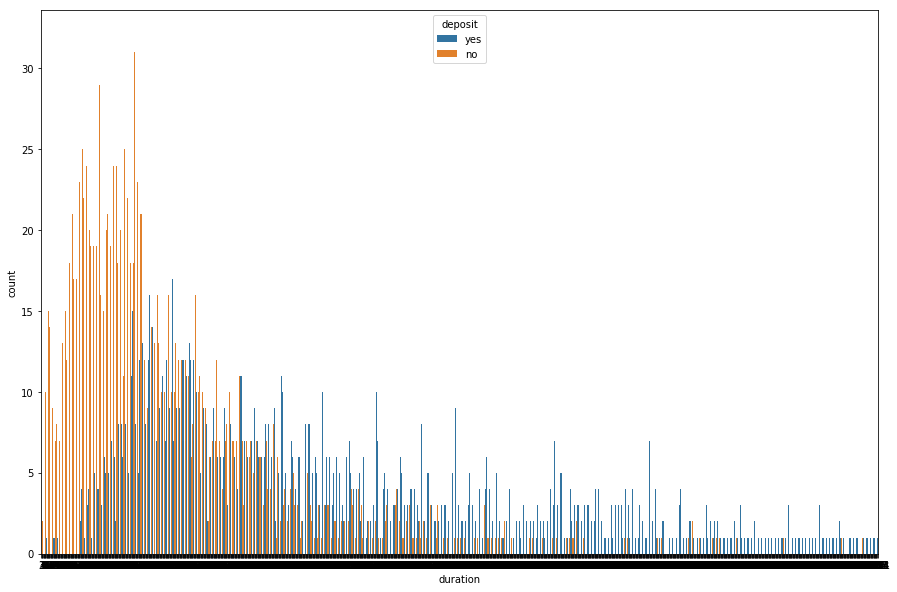

In [23]:
plt.figure(figsize=(15,10))
sns.countplot('duration',data = data,hue='deposit')

Clients with whom the duration of call lasted for longer periods of time tend to subscribe to term deposits

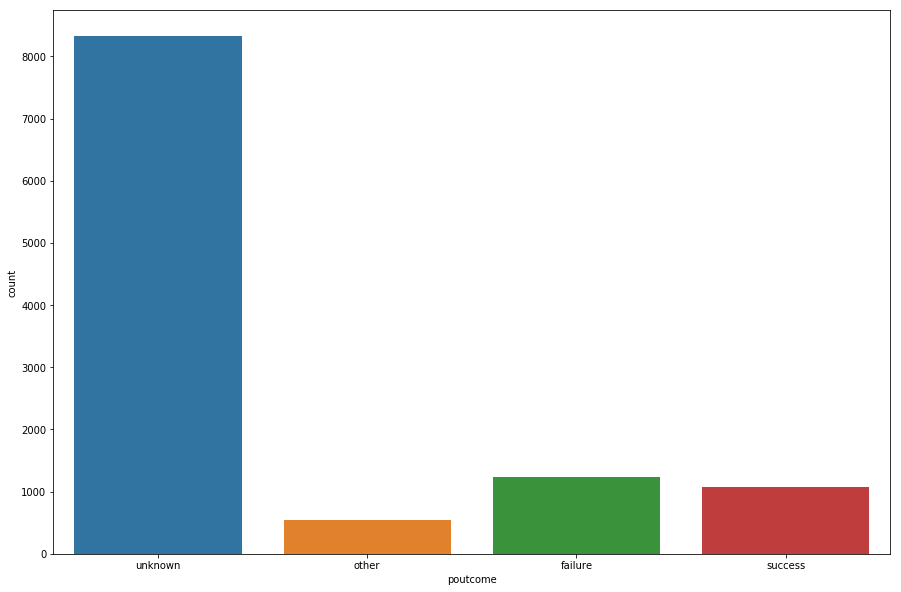

In [25]:
plt.figure(figsize=(15,10))
sns.countplot('poutcome',data = data)

In [28]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown',
       'self-employed', 'student'], dtype=object)

In [29]:
jobs = {
    'admin.':1,
    'technician':2,
    'services':3,
    'management':4,
    'retired':5,
    'blue-collar':6,
    'unemployed':7,
    'entrepreneur':8,
    'housemaid':9,
    'unknown':0,
    'self-employed':10,
    'student':11
}

data = data.replace({'job':jobs},) 

In [30]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [31]:
marital = {
    'married':1,
    'single':2,
    'divorced':3
}

data = data.replace({'marital':marital})

In [32]:
data['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [33]:
education = {
    'secondary':1,
    'tertiary':2,
    'primary':3,
    'unknown':0
}

data = data.replace({'education':education})

In [35]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [37]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
data['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
default = {
    'no':0,
    'yes':1
}

data = data.replace({'default':default,'housing':default,'loan':default,'deposit':default})

In [40]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [41]:
contact = {
    'unknown':0,
    'cellular':1,
    'telephone':2
}

data = data.replace({'contact':contact})

In [42]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [43]:
month = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

data = data.replace({'month':month})

In [44]:
data['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [45]:
poutcome = {
    'unknown':0,
    'other':1,
    'failure':2,
    'success':3
}

data = data.replace({'poutcome':poutcome})

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [47]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.006349,-0.141610,0.120806,-0.011425,0.112300,-0.168700,-0.031418,0.135411,-0.000762,0.069312,0.000189,-0.005278,0.002774,0.020169,0.044880,0.034901
job,-0.006349,1.000000,-0.015943,0.178020,0.021488,0.014680,-0.078711,-0.045122,0.011909,-0.009604,0.006207,0.019971,-0.011725,-0.025605,-0.012549,-0.008664,0.024902
marital,-0.141610,-0.015943,1.000000,-0.033793,0.013950,-0.026316,-0.022530,-0.019343,-0.016336,-0.001393,-0.032277,0.035748,-0.037285,0.006591,-0.008577,-0.008716,0.068325
education,0.120806,0.178020,-0.033793,1.000000,0.003599,0.037351,-0.040511,-0.021496,0.008602,-0.003182,0.013675,0.011850,0.010744,-0.028692,-0.001618,-0.020162,-0.001849
default,-0.011425,0.021488,0.013950,0.003599,1.000000,-0.060954,0.011076,0.076434,-0.045252,0.017342,0.006561,-0.009760,0.030975,-0.036282,-0.035273,-0.053619,-0.040680
balance,0.112300,0.014680,-0.026316,0.037351,-0.060954,1.000000,-0.077092,-0.084589,0.067053,0.010467,0.063818,0.022436,-0.013894,0.017411,0.030805,0.046478,0.081129
housing,-0.168700,-0.078711,-0.022530,-0.040511,0.011076,-0.077092,1.000000,0.076761,-0.247982,-0.014770,-0.117996,0.035051,0.006660,0.064497,-0.000840,-0.062070,-0.203888
loan,-0.031418,-0.045122,-0.019343,-0.021496,0.076434,-0.084589,0.076761,1.000000,-0.020533,0.017269,0.005308,-0.001914,0.034722,-0.030416,-0.022668,-0.069933,-0.110580
contact,0.135411,0.011909,-0.016336,0.008602,-0.045252,0.067053,-0.247982,-0.020533,1.000000,0.004602,0.129358,0.002520,-0.012773,0.187992,0.156236,0.223145,0.212974
day,-0.000762,-0.009604,-0.001393,-0.003182,0.017342,0.010467,-0.014770,0.017269,0.004602,1.000000,0.060431,-0.018511,0.137007,-0.077232,-0.058981,-0.081805,-0.056326


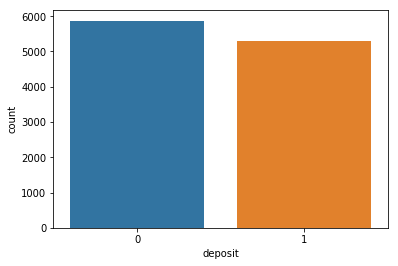

In [48]:
sns.countplot('deposit',data = data)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [50]:
model1 = LogisticRegression()

In [51]:
x = data.drop(['deposit'],axis=1)

In [52]:
y = data[['deposit']]

In [53]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,1,1,1,0,2343,1,0,0,5,5,1042,1,-1,0,0
1,56,1,1,1,0,45,0,0,0,5,5,1467,1,-1,0,0
2,41,2,1,1,0,1270,1,0,0,5,5,1389,1,-1,0,0
3,55,3,1,1,0,2476,1,0,0,5,5,579,1,-1,0,0
4,54,1,1,2,0,184,0,0,0,5,5,673,2,-1,0,0


In [54]:
y.head()

,deposit
0,1
1,1
2,1
3,1
4,1


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [56]:
model1.fit(x_train,y_train)

d:\python3.6\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
model1.score(x_train,y_train)

0.79512603034285034

In [58]:
model1.score(x_test,y_test)

0.7875313507703332

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
model2 = RandomForestClassifier(n_estimators=52)

In [78]:
model2.fit(x_train,y_train)

d:\python3.6\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
model2.score(x_train,y_train)

0.99976107991876717

In [80]:
model2.score(x_test,y_test)

0.85202436402723036

In [81]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [82]:
pred = model2.predict(x_test)

In [83]:
precision_score(y_test,pred)

0.8285514345696291

In [84]:
recall_score(y_test,pred)

0.87573964497041423